<!-- Importing Libraries -->

# Importing Libraries

In [136]:
import numpy as np 
import pandas as pd
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import seaborn as sns; sns.set()
import joblib
import preprocessing 


from plotly.offline import init_notebook_mode, iplot, plot
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

# Importing Dataset

In [137]:
date = pd.read_csv(r"E:\Solution Challenge\Cafe\Cafe+-+DateInfo.csv")
transaction = pd.read_csv(r"E:\Solution Challenge\Cafe\Cafe+-+Transaction+-+Store.csv")

# Filtering Data

In [138]:
transaction = transaction[transaction["SELL_ID"] == 1070]

In [139]:
transaction['YEAR'] = pd.DatetimeIndex(transaction['CALENDAR_DATE']).year
transaction['DATE'] = pd.DatetimeIndex(transaction['CALENDAR_DATE']).day

In [140]:
transaction = transaction[transaction["YEAR"] == 2012]

In [141]:
transaction = transaction.reset_index(drop = True)

In [142]:
transaction = transaction.drop(['PRICE', 'SELL_CATEGORY'], axis = 1)


In [143]:
date = date[date["YEAR"] == 2012]

In [144]:
date = date.drop(['CALENDAR_DATE', 'YEAR','IS_SCHOOLBREAK'], axis = 1)

# Merging Datasets

In [145]:
transaction['HOLIDAY'] = date['HOLIDAY']
transaction['IS_WEEKEND'] = date['IS_WEEKEND']
transaction['IS_OUTDOOR'] = date['IS_OUTDOOR']
transaction['AVERAGE_TEMPERATURE'] = date['AVERAGE_TEMPERATURE']

In [146]:
transaction.head()

,CALENDAR_DATE,QUANTITY,SELL_ID,YEAR,DATE,HOLIDAY,IS_WEEKEND,IS_OUTDOOR,AVERAGE_TEMPERATURE
0,01/01/12,46,1070,2012,1,New Year,1,0,24.8
1,01/02/12,70,1070,2012,2,New Year,0,0,24.8
2,01/03/12,62,1070,2012,3,New Year,0,1,32.0
3,01/04/12,88,1070,2012,4,NaN,0,1,32.0
4,01/05/12,104,1070,2012,5,NaN,0,0,24.8


In [147]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CALENDAR_DATE        365 non-null    object 
 1   QUANTITY             365 non-null    int64  
 2   SELL_ID              365 non-null    int64  
 3   YEAR                 365 non-null    int64  
 4   DATE                 365 non-null    int64  
 5   HOLIDAY              29 non-null     object 
 6   IS_WEEKEND           365 non-null    int64  
 7   IS_OUTDOOR           365 non-null    int64  
 8   AVERAGE_TEMPERATURE  365 non-null    float64
dtypes: float64(1), int64(6), object(2)
memory usage: 25.8+ KB


In [148]:
def bar_plot(variable):
    # get feature
    var = transaction[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))

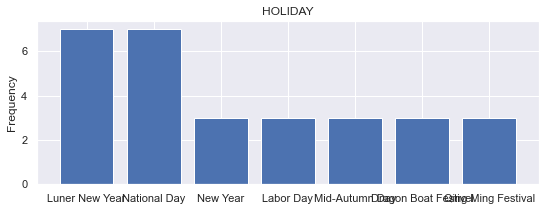

HOLIDAY:
Luner New Year          7
National Day            7
New Year                3
Labor Day               3
Mid-Autumn Day          3
Dragon Boat Festivel    3
Qing Ming Festival      3
Name: HOLIDAY, dtype: int64


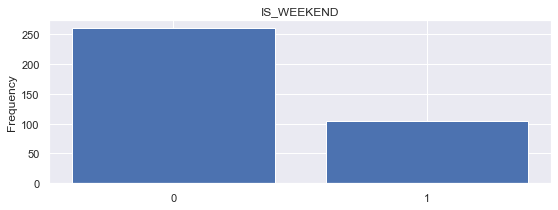

IS_WEEKEND:
0    260
1    105
Name: IS_WEEKEND, dtype: int64


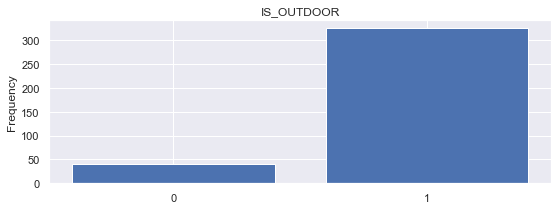

IS_OUTDOOR:
1    325
0     40
Name: IS_OUTDOOR, dtype: int64


In [149]:
sns.set_style('darkgrid')
categorical_variables = ['HOLIDAY','IS_WEEKEND','IS_OUTDOOR']
for c in categorical_variables:
    bar_plot(c)

In [150]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(transaction[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Distribution with Histogram".format(variable))
    plt.show()

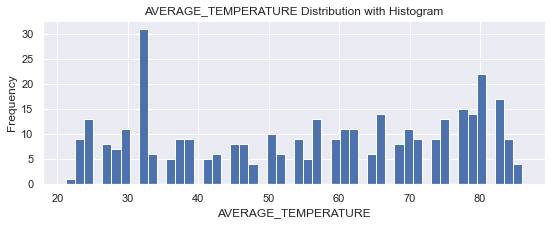

In [151]:
numerical_variables = ['AVERAGE_TEMPERATURE']
for n in numerical_variables:
    plot_hist(n)

In [152]:
transaction.dtypes

CALENDAR_DATE           object
QUANTITY                 int64
SELL_ID                  int64
YEAR                     int64
DATE                     int64
HOLIDAY                 object
IS_WEEKEND               int64
IS_OUTDOOR               int64
AVERAGE_TEMPERATURE    float64
dtype: object

# Basic Data Analysis

In [153]:
# Average(mean) quantity rate by holiday

In [154]:
transaction[["HOLIDAY","QUANTITY"]].groupby(["HOLIDAY"], as_index = False).mean().sort_values(by="QUANTITY",ascending = False)

,HOLIDAY,QUANTITY
1,Labor Day,63.333333
3,Mid-Autumn Day,61.333333
6,Qing Ming Festival,61.333333
0,Dragon Boat Festivel,60.666667
5,New Year,59.333333
4,National Day,56.571429
2,Luner New Year,54.000000


In [155]:
# Just checking occurence using pie graphs

In [156]:
from plotly.offline import iplot
df = transaction

labels = transaction["HOLIDAY"].value_counts().index
pie1 = transaction['HOLIDAY'].value_counts().values
# figure
fig = {
  "data": [
    {
      "values": pie1,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "",
      "hoverinfo":"label+percent+name+value",
      "hole": .2,
      "type": "pie"
    },],
  "layout": {
        "title":"Distribution based on Holidays",
        "annotations": [
            { "font": { "size": 25},
              "showarrow": True,
              "text": "Is_Holiday",
                "x": 1,
                "y": 1,
            },
        ]
    }
}
iplot(fig)

In [157]:
transaction[["IS_WEEKEND","QUANTITY"]].groupby(["IS_WEEKEND"], as_index = False).mean().sort_values(by="QUANTITY",ascending = False)

,IS_WEEKEND,QUANTITY
0,0,88.015385
1,1,62.209524


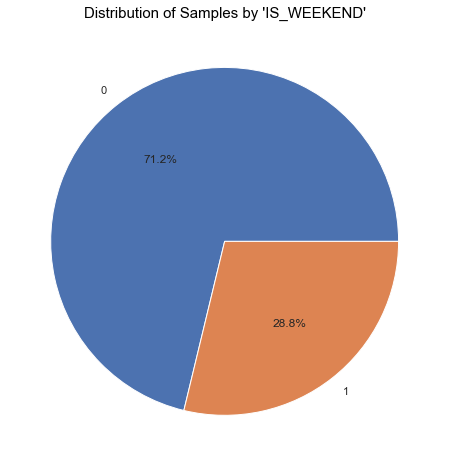

In [158]:
labels = transaction['IS_WEEKEND'].value_counts().index
sizes = transaction['IS_WEEKEND'].value_counts().values

plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Distribution of Samples by 'IS_WEEKEND'",color = 'black',fontsize = 15);

In [159]:
transaction[["IS_OUTDOOR","QUANTITY"]].groupby(["IS_OUTDOOR"], as_index = False).mean().sort_values(by="QUANTITY",ascending = False)

,IS_OUTDOOR,QUANTITY
0,0,93.450000
1,1,79.009231


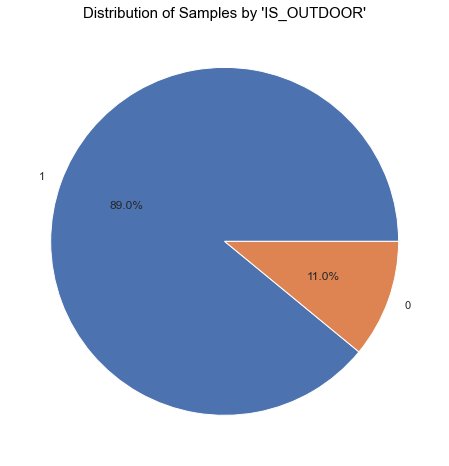

In [160]:
labels = transaction['IS_OUTDOOR'].value_counts().index
sizes = transaction['IS_OUTDOOR'].value_counts().values

plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Distribution of Samples by 'IS_OUTDOOR'",color = 'black',fontsize = 15);

In [161]:
transaction[["AVERAGE_TEMPERATURE","QUANTITY"]].groupby(["AVERAGE_TEMPERATURE"], as_index = False).mean().sort_values(by="QUANTITY",ascending = False)

,AVERAGE_TEMPERATURE,QUANTITY
0,21.2,104.000000
1,23.0,97.333333
5,30.2,94.545455
36,86.0,91.000000
4,28.4,90.000000
10,39.2,87.555556
2,24.8,85.538462
14,46.4,84.500000
31,77.0,84.400000
28,71.6,83.777778


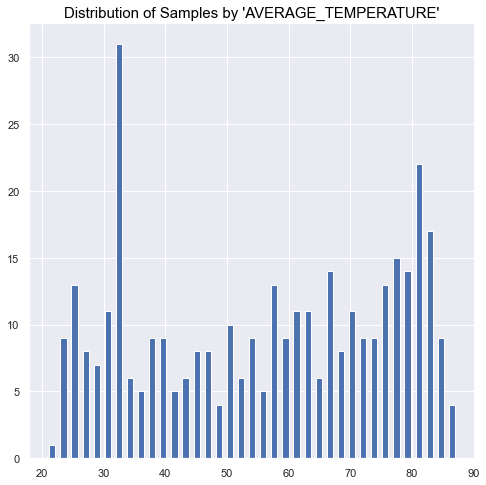

In [162]:
labels = transaction['AVERAGE_TEMPERATURE'].value_counts().index
sizes = transaction['AVERAGE_TEMPERATURE'].value_counts().values

plt.figure(figsize = (8,8))
plt.bar(labels, height=sizes,  align='edge', width=1)
plt.title("Distribution of Samples by 'AVERAGE_TEMPERATURE'",color = 'black',fontsize = 15);

# Pandas Profiling

In [163]:
import pandas_profiling as pp
pp.ProfileReport(transaction)

# Missing Values

In [164]:
transaction[transaction['HOLIDAY'].isnull()]

,CALENDAR_DATE,QUANTITY,SELL_ID,YEAR,DATE,HOLIDAY,IS_WEEKEND,IS_OUTDOOR,AVERAGE_TEMPERATURE
3,01/04/12,88,1070,2012,4,NaN,0,1,32.0
4,01/05/12,104,1070,2012,5,NaN,0,0,24.8
5,01/06/12,100,1070,2012,6,NaN,0,0,23.0
6,01/07/12,70,1070,2012,7,NaN,1,0,26.6
7,01/08/12,70,1070,2012,8,NaN,1,0,26.6
...,...,...,...,...,...,...,...,...,...
360,12/27/12,88,1070,2012,27,NaN,0,1,30.2
361,12/28/12,108,1070,2012,28,NaN,0,0,30.2
362,12/29/12,58,1070,2012,29,NaN,1,1,26.6
363,12/30/12,62,1070,2012,30,NaN,1,1,28.4


In [165]:
transaction['HOLIDAY'] = transaction['HOLIDAY'].fillna(0)

# Encoding

In [166]:
print("Unique Values for HOLIDAY", transaction['HOLIDAY'].unique())
print("Unique Values for IS_WEEKEND", transaction['IS_WEEKEND'].unique())
print("Unique Values for IS_OUTDOOR", transaction['IS_OUTDOOR'].unique())
print("Unique Values for AVERAGE_TEMPERATURE", transaction['AVERAGE_TEMPERATURE'].unique())

Unique Values for HOLIDAY ['New Year' 0 'Luner New Year' 'Qing Ming Festival' 'Labor Day'
 'Dragon Boat Festivel' 'Mid-Autumn Day' 'National Day']
Unique Values for IS_WEEKEND [1 0]
Unique Values for IS_OUTDOOR [0 1]
Unique Values for AVERAGE_TEMPERATURE [24.8 32.  23.  26.6 21.2 28.4 37.4 39.2 42.8 30.2 33.8 35.6 41.  44.6
 46.4 50.  55.4 48.2 51.8 57.2 53.6 60.8 62.6 66.2 69.8 64.4 68.  59.
 71.6 75.2 73.4 80.6 77.  82.4 78.8 84.2 86. ]


In [167]:
transaction = transaction.replace(['New Year', 'Luner New Year', 'Qing Ming Festival', 'Labor Day', 'Dragon Boat Festivel','Mid-Autumn Day', 'National Day'], 1)

In [168]:
transaction

,CALENDAR_DATE,QUANTITY,SELL_ID,YEAR,DATE,HOLIDAY,IS_WEEKEND,IS_OUTDOOR,AVERAGE_TEMPERATURE
0,01/01/12,46,1070,2012,1,1,1,0,24.8
1,01/02/12,70,1070,2012,2,1,0,0,24.8
2,01/03/12,62,1070,2012,3,1,0,1,32.0
3,01/04/12,88,1070,2012,4,0,0,1,32.0
4,01/05/12,104,1070,2012,5,0,0,0,24.8
...,...,...,...,...,...,...,...,...,...
360,12/27/12,88,1070,2012,27,0,0,1,30.2
361,12/28/12,108,1070,2012,28,0,0,0,30.2
362,12/29/12,58,1070,2012,29,0,1,1,26.6
363,12/30/12,62,1070,2012,30,0,1,1,28.4


# Train-Test-Split

In [169]:
features = ['YEAR', 'DATE', 'HOLIDAY','IS_WEEKEND', 'AVERAGE_TEMPERATURE']
label = ['QUANTITY']

X = transaction[features]
y = transaction[label]

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

<!--  -->

# Random Forest Model

In [171]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

# Feature Importance

In [173]:
filename = 'final.sav'
joblib.dump(clf, filename)

['final.sav']